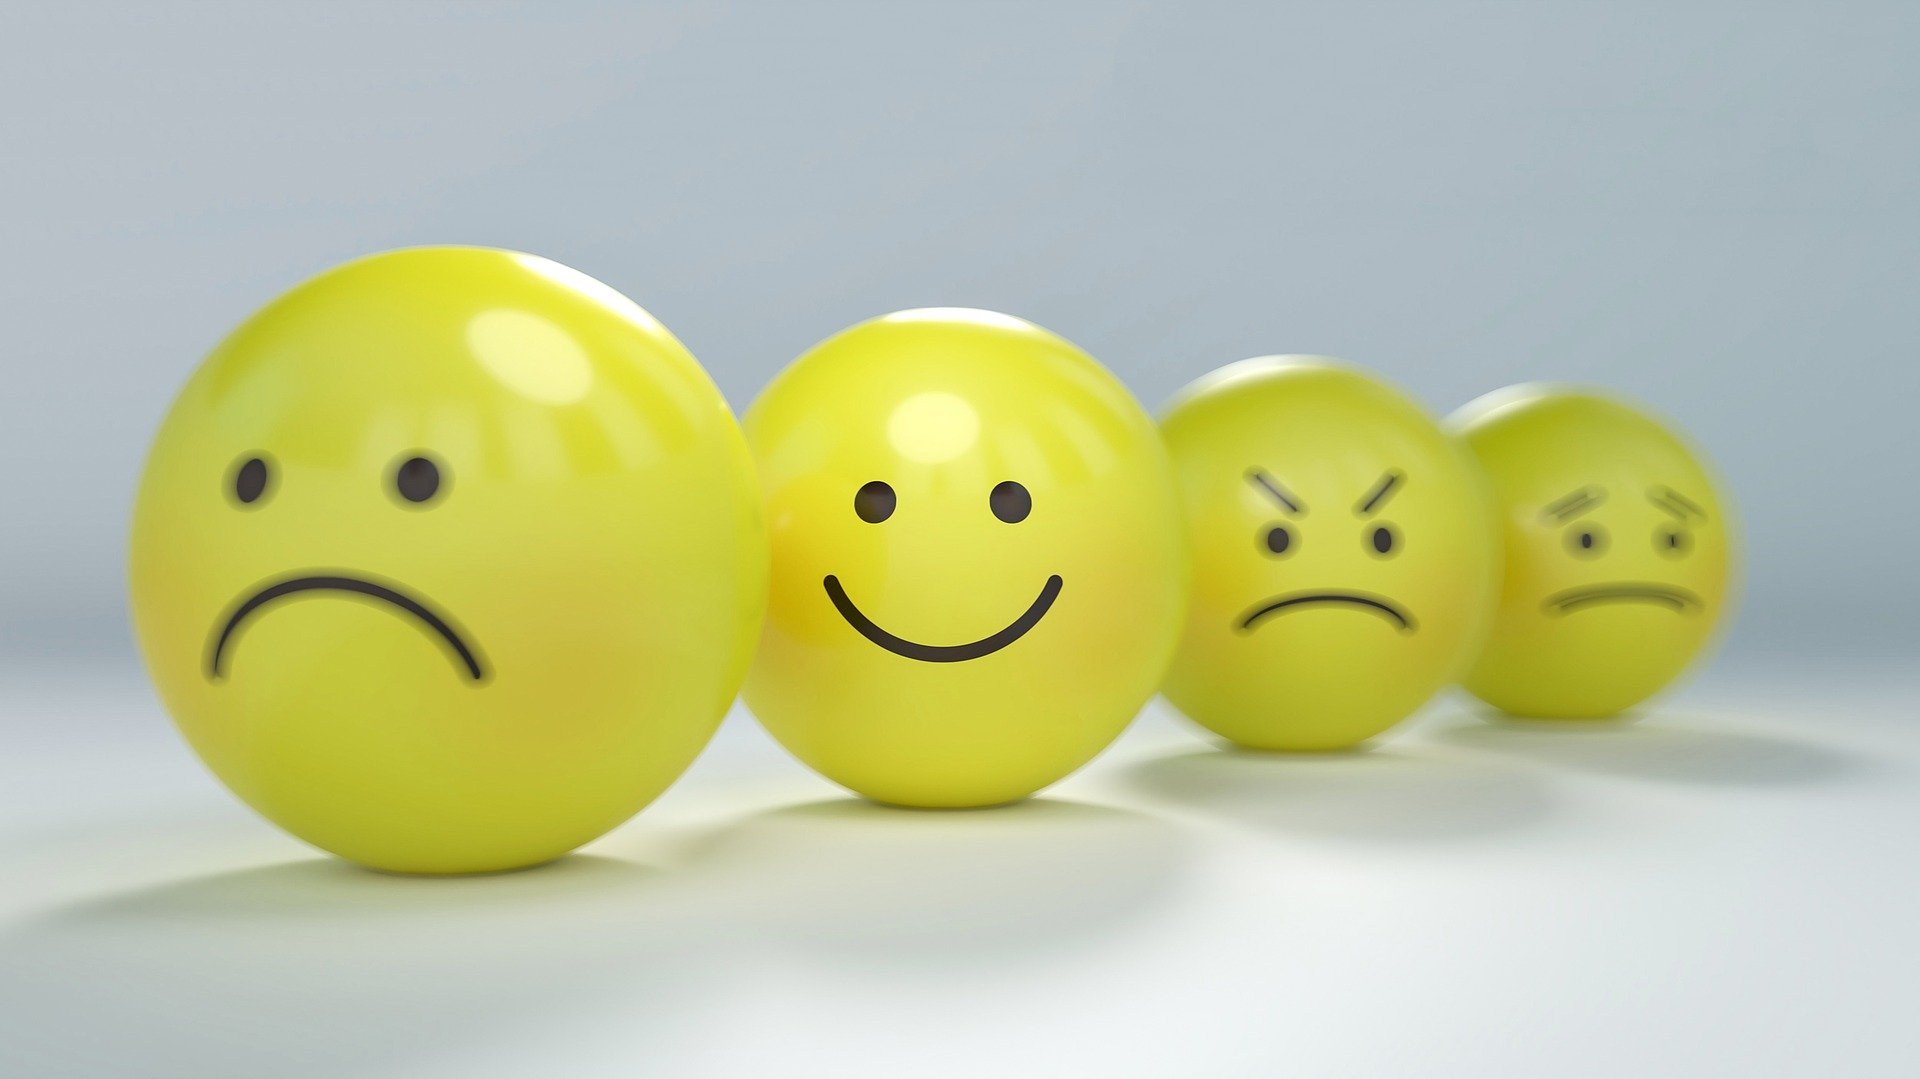

# Contents
1. [Data Import & Check](#Data-Import-&-Check)
2. [Correlation Map](#Correlation-Map)
3. [Bubble Chart](#Bubble-Chart)
4. [Vertical Bar Plot](#Vertical-Bar-Plot)
5. [Horizontal Bar Plot](#Horizontal-Bar-Plot)
6. [Pie Chart](#Pie-Chart)
7. [Line Plot](#Line-Plot)


#### I hope you like the kernel. Please share your suggestions :)

<a id="Data-Import-&-Check"></a>
# 1. Data Import & Check

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import difflib
pd.set_option('display.max_columns', 500)
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_2015 = pd.read_csv("../input/world-happiness-report/2015.csv")
df_2016 = pd.read_csv("../input/world-happiness-report/2016.csv")
df_2017 = pd.read_csv("../input/world-happiness-report/2017.csv")
df_2018 = pd.read_csv("../input/world-happiness-report/2018.csv")
df_2019 = pd.read_csv("../input/world-happiness-report/2019.csv")
df_2020 = pd.read_csv("../input/world-happiness-report/2020.csv")

In [ ]:
df_2020.info()

In [ ]:
df_2020.head(5)

In [ ]:
df_2020.tail(5)

<a id="Correlation-Map"></a>
# 2. Correlation Map

In [ ]:
corrMatrix = df_2020.corr()
fig, ax = plt.subplots(figsize=(12,12))
sn.heatmap(corrMatrix.round(2), annot=True)
plt.title("Correlation Map")
plt.show()

<a id="Bubble-Chart"></a>
# 3. Bubble Chart

In [ ]:
fig = go.Figure(data = [go.Scatter(
    x = df_2020["Logged GDP per capita"],
    y = df_2020["Ladder score"], mode = 'markers',
    text = list(df_2020["Country name"]),
    marker_size = df_2020["Ladder score"]*2,
    marker = dict(
            color="green",
            opacity=[0.9]
    )
)])
fig.update_layout(
    title='GDP & Happiness Comparison',
    xaxis=dict(
        title='GDP',
        gridcolor='white',
        gridwidth=1,
    ),
    yaxis=dict(
        title='Ladder Score',
        gridcolor='white',
        gridwidth=1,
    )
)

fig.show()


<a id="Vertical-Bar-Plot"></a>
# 4. Vertical Bar Plot

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
countries = df_2020.iloc[0:10,0]
score = df_2020.iloc[0:10,2]
plt.bar(countries,score, color=(0, 0.5, 0.7, 0.9), edgecolor= 'cyan')
plt.xlabel("Countries")
plt.ylabel("Overall Score")
plt.title("Top 10 Countries by Overall Score")
plt.ylim(7,7.85)

plt.show()

<a id="Horizontal-Bar-Plot"></a>
# 5. Horizontal Bar Plot

In [ ]:
print("2015 Freedom Score: {}".format(round(df_2015["Freedom"].mean(),2)))
print("2016 Freedom Score: {}".format(round(df_2016["Freedom"].mean(),2)))
print("2017 Freedom Score: {}".format(round(df_2017["Freedom"].mean(),2)))
print("2018 Freedom Score: {}".format(round(df_2018["Freedom to make life choices"].mean(),2)))
print("2019 Freedom Score: {}".format(round(df_2019["Freedom to make life choices"].mean(),2)))
print("2020 Freedom Score: {}".format(round(df_2020["Freedom to make life choices"].mean(),2)))

In [ ]:
y_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
x_axis = [round(df_2015["Freedom"].mean(),2), round(df_2016["Freedom"].mean(),2), round(df_2017["Freedom"].mean(),2),round(df_2018["Freedom to make life choices"].mean(),2), 
          round(df_2019["Freedom to make life choices"].mean(),2), round(df_2020["Freedom to make life choices"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(y_axis, x_axis, align='center', color = 'r', alpha = 0.7)
plt.xlabel("Freedom Score")
plt.ylabel("Years")
plt.title("Average Freedom Score by Years")
plt.show()


<a id="Pie-Chart"></a>
# 6. Pie Chart

In [ ]:
last10_countryname = df_2020["Country name"].iloc[-10:]
last10_countryscore = df_2020["Ladder score"].iloc[-10:]
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(last10_countryscore, explode = (0,0,0,0,0,0,0,0,0,0.1), labels=last10_countryname, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("The score comparison of last 10 countries")
plt.show()

<a id="Line-Plot"></a>
# 7. Line Plot

In [ ]:
values = df_2020.iloc[0:20,8]
fig2, ax2 = plt.subplots(figsize=(20,8))
plt.xlabel("Country Name")
plt.ylabel("Healty Life Score")
plt.plot(df_2020.iloc[0:20,0], values, color = 'r')
plt.xticks(df_2020.iloc[0:20,0], rotation='vertical')
plt.title("Healty Life Expectancy of top20 Countries")
plt.show()

In [ ]:

plt.figure(figsize=(30,8))
plt.plot(df_2020["Ladder score"], marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label="Ladder Score")
plt.plot(df_2020["Logged GDP per capita"], marker='', color='magenta', linewidth=2, linestyle='dashed', label="GDP per Capita")
plt.xlabel("Country ID")
plt.ylabel("GDP per Capita")
plt.title("Ladder Score - GDP per Capita Line Plot")
plt.legend()
